Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Import Model Building libaries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Import libaries for encoding data
from category_encoders import OneHotEncoder

# Import Visualization libaries
import matplotlib.pyplot as plt

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)

    # Function to replace space with nospace
    def nospace(x):
      return x.replace(" ", "")
    df = df.apply(nospace)

    # function to replace all x with 0
    def newx(x):
      return x.replace("x", "0")
    df = df.apply(newx)

    # function to replace all X with 1 
    def new_x(x):
      return x.replace("X", "1")
    df = df.apply(new_x)

    # function to replace all No with 0
    def new_n(x):
      return x.replace("No","0")
    df = df.apply(new_n)

    # function to replace all Yes with 1
    def new_y(x):
      return x.replace("Yes","1")
    df = df.apply(new_y)

    # Columns for int conversion
    cols_to_change = ['Chips','NonSD','Beef','Pico','Guac','Cheese','Fries','Sour cream','Pork','Shrimp','Rice','Beans','Tomato','Bell peper','Cabbage','Sauce','Salsa.1','Cilantro','Onion']

    # function to replace all strings to int values
    df[cols_to_change] = df[cols_to_change].applymap(lambda x: 1 if type(x) == str else 0)

    # function to take all of the following's column and replace them with binary values, then convert it to an int
    burrito_type = ['california','asada','surf','carnitas']
    for b in burrito_type:
      df[b] = df['Burrito'].str.lower().str.contains(b).astype(int)

    # Drop columns that are going to mess with the model in some way
    df = df.drop(columns=['Notes','Location','Address','URL','Neighborhood','Unreliable','Queso','Sushi','Chile relleno','Zucchini','Lobster','Bacon','Fish','Mushroom','Ham','Avocado','Chicken','Nopales','Avocado','Corn','Taquito','Egg','Pineapple','Carrots','Lettuce','Rec', 'overall','Burrito','Reviewer'])

    return df

filepath = DATA_PATH + 'burritos/burritos.csv'

# Using the wrangle function created above to clean the dataset before training models
df = wrangle(filepath)

**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [ ]:
# EDA
df.columns

Index(['Yelp', 'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)',
       'Density (g/mL)', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp',
       'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy',
       'Wrap', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
       'Sour cream', 'Pork', 'Shrimp', 'Rice', 'Beans', 'Tomato', 'Bell peper',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Great',
       'california', 'asada', 'surf', 'carnitas'],
      dtype='object')

In [ ]:
# EDA
df.info()

In [ ]:
  threshold = .75*len('Year')
  cols_to_drop = []
  for cols in df.select_dtypes('object'):
    if df[cols].nunique() > threshold:
      cols_to_drop.append(cols)
print('High Card:',cols_to_drop)
print('---------------------------------------------------')
print(df['Length'].value_counts())
print('---------------------------------------------------')
print(df['Google'].value_counts())
print('---------------------------------------------------')
print(df['Great'].value_counts())
print('---------------------------------------------------')
print(df['Tomato'].value_counts())
print('---------------------------------------------------')
print('Percentage of null values within dataset')
print('===================================================')
((df.isnull()).sum()*100/(len(df))).round(2)

In [ ]:
# EDA
df.head(10)

During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [ ]:
# Split your dataset into the feature matrix X and the target vector y. You want to predict 'Great'
target='Great'
X = df.drop(columns=target)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [ ]:
# Split X and y into a training set (X_train, y_train) and a test set (X_test, y_test)
mask = X.index.year < 2018
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [ ]:
# Figure out what is the majority class in y_train and what percentage of your training observations it represents
baseline_acc = y_train.value_counts(normalize=True)
print('Baseline Accuracy Score:', baseline_acc.max())

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [ ]:
# Build a Pipeline named model_logr, and fit it to your training data
model_logr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)
model_logr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [ ]:
# Calculate the training and test accuracy score for model_logr
training_acc = model_logr.score(X_train,y_train)
test_acc = model_logr.score(X_test,y_test)

# Print the results:
print('Training Accuracy Score:', training_acc)
print('===================================================')
print('Test Accuracy Score:', test_acc)

Training Accuracy Score: 0.8903394255874674
Test Accuracy Score: 0.7368421052631579


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

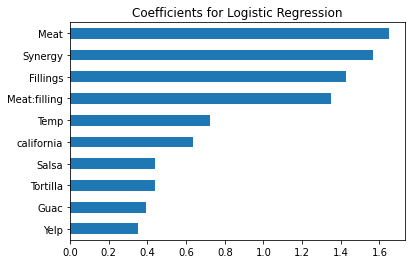

In [ ]:
# Create your horizontal barchart here.
coefficients = model_logr.named_steps['logisticregression'].coef_[0]
features = model_logr.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.title('Coefficients for Logistic Regression');

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [ ]:
# Write code here to explore the differences between `predict` and `predict_proba`.

y_pred = model_logr.predict(X_test)
y_preda = model_logr.predict_proba(X_test)

print(y_pred)
print('----------------------------------------------------------')
print(y_preda)
print('==========================================================')
print(y_pred.shape)
print('----------------------------------------------------------')
print(y_preda.shape)

[1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1]
----------------------------------------------------------
[[4.66170269e-05 9.99953383e-01]
 [1.47413290e-03 9.98525867e-01]
 [9.99672693e-01 3.27306804e-04]
 [1.95945292e-05 9.99980405e-01]
 [9.99146929e-01 8.53070856e-04]
 [8.39026291e-01 1.60973709e-01]
 [2.00687744e-02 9.79931226e-01]
 [2.23523264e-04 9.99776477e-01]
 [1.44017844e-01 8.55982156e-01]
 [7.12300930e-02 9.28769907e-01]
 [3.27568306e-01 6.72431694e-01]
 [9.52006063e-01 4.79939372e-02]
 [1.35353013e-01 8.64646987e-01]
 [2.15113285e-01 7.84886715e-01]
 [1.45011607e-01 8.54988393e-01]
 [4.00914547e-02 9.59908545e-01]
 [5.81450151e-02 9.41854985e-01]
 [9.94516250e-01 5.48375027e-03]
 [9.98540407e-01 1.45959300e-03]
 [9.94701424e-01 5.29857620e-03]
 [9.90706606e-01 9.29339411e-03]
 [2.04518684e-02 9.79548132e-01]
 [8.80847705e-01 1.19152295e-01]
 [6.92317967e-01 3.07682033e-01]
 [2.41372758e-01 7.58627242e-01]
 [9.51321857e-01 4.86781429e-02]
 [9.

**Give your written answer here:**

```
- What data type do `predict` and `predict_proba` output?
* The output is a numpy array

- What are the shapes of their different output?
* y_pred - 38,0
* y_preda - 38,2

- What numerical values are in the output?
*Binary output that shows if a burrito is great or not

- What do those numerical values represent?
*The proability % of the output
```